Colab Link : [Notebook](https://colab.research.google.com/drive/1zSchTcXn_4uFJVLpLR4Cm4YZkCzZ6xrn?usp=sharing)

# Question 1

Importing the diabetes dataset

[diabetes.csv](https://drive.google.com/file/d/1J9q0sesAEc21upkY-gymG52WdrvfGDBV/view?usp=sharing)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
dataset = read.csv("diabetes.csv")
head(dataset)

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50       1
2                    0.351  31       0
3                    0.672  32       1
4                    0.167  21       0
5                    2.288  33       1
6                    0.201  30       0


Independent variables (input variables) are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,  BMI, DiabetesPedigreeFunction, and Age.

Dependent variable(output variable) is Outcome.

Statistical info

In [ ]:
%%R
summary(dataset)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

# (a) Splitting the data into 80 % training and 20 % testing sets

Based on the information seen above logistic regression so for the Generalized Linear model (GLM) the parameters are all independent variables, the training set and distribution is binomial since it either 0's or 1's.

In [ ]:
%%R
n = nrow(dataset)
indexes = sample(n,n*(80/100))
trainset = dataset[indexes,]
testset = dataset[-indexes,]

In [ ]:
%%R
glm1 = glm(Outcome ~ ., data = trainset, family = "binomial")
summary(glm1)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6488  -0.7346  -0.4154   0.7491   2.9817  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.410513   0.796526 -10.559  < 2e-16 ***
Pregnancies               0.104850   0.035132   2.984  0.00284 ** 
Glucose                   0.036287   0.004249   8.540  < 2e-16 ***
BloodPressure            -0.014000   0.005662  -2.473  0.01340 *  
SkinThickness             0.001741   0.007850   0.222  0.82452    
Insulin                  -0.000910   0.001009  -0.902  0.36713    
BMI                       0.091807   0.016728   5.488 4.06e-08 ***
DiabetesPedigreeFunction  0.936239   0.338841   2.763  0.00573 ** 
Age                       0.011601   0.010270   1.130  0.25866    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

   

# (b) We accept values below 0.05 and reject values Pr(>|z|) > 0.05 all above it
These are the columns 𝛼 > 0.05 SkinThickness,DiabetesPedigreeFunction,Age.
So we dont consider in training our model

In [ ]:
%%R
glm2 = glm(Outcome ~ Pregnancies+Glucose+BloodPressure+Insulin+BMI, data = trainset, family = "binomial")
summary(glm2)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    Insulin + BMI, family = "binomial", data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2483  -0.7470  -0.4401   0.7892   2.9417  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -7.2731456  0.7190085 -10.116  < 2e-16 ***
Pregnancies    0.1236813  0.0308223   4.013  6.0e-05 ***
Glucose        0.0363007  0.0039555   9.177  < 2e-16 ***
BloodPressure -0.0142541  0.0055861  -2.552   0.0107 *  
Insulin       -0.0017379  0.0008974  -1.937   0.0528 .  
BMI            0.0849126  0.0155968   5.444  5.2e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.42  on 613  degrees of freedom
Residual deviance: 599.15  on 608  degrees of freedom
AIC: 611.15

Number of Fisher Scoring iterations: 5



Insulin has 𝛼 > 0.05 we dont include this column in model training

In [ ]:
%%R
glm3 = glm(Outcome ~ Pregnancies+Glucose+BloodPressure+BMI, data = trainset, family = "binomial")
summary(glm3)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    BMI, family = "binomial", data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1442  -0.7481  -0.4471   0.7653   2.8969  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -7.014920   0.695931 -10.080  < 2e-16 ***
Pregnancies    0.130667   0.030482   4.287 1.81e-05 ***
Glucose        0.033830   0.003672   9.213  < 2e-16 ***
BloodPressure -0.014109   0.005495  -2.567   0.0102 *  
BMI            0.080719   0.015257   5.291 1.22e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.42  on 613  degrees of freedom
Residual deviance: 602.87  on 609  degrees of freedom
AIC: 612.87

Number of Fisher Scoring iterations: 5



# (c) Predicting the values using our training set

In [ ]:
#predict
%%R
pred = predict(glm3,testset, type="response")

actual = testset$Outcome
length(actual)


[1] 154


In [ ]:
%%R
predictedvalues=rep(0,length(pred))
length(pred)


[1] 154


Displaying the predicted values

In [ ]:
%%R
predictedvalues[pred>0.5]=1
predictedvalues

  [1] 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 [38] 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 [75] 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
[112] 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
[149] 1 0 1 1 0 0


# (d) Providing confusion matrix annd correctness of prediction

In [ ]:
%%R
confusion_matrix=table( predictedvalues, actual)
confusion_matrix

               actual
predictedvalues  0  1
              0 92 20
              1 10 32


correctness of prediction

In [ ]:
%%R
acu_log=mean(predictedvalues == actual)
acu_log

[1] 0.8051948


Finally, we could say using GLM our model is 80.51% accurate.

# Question 2

# (a) calculating Likelihood 

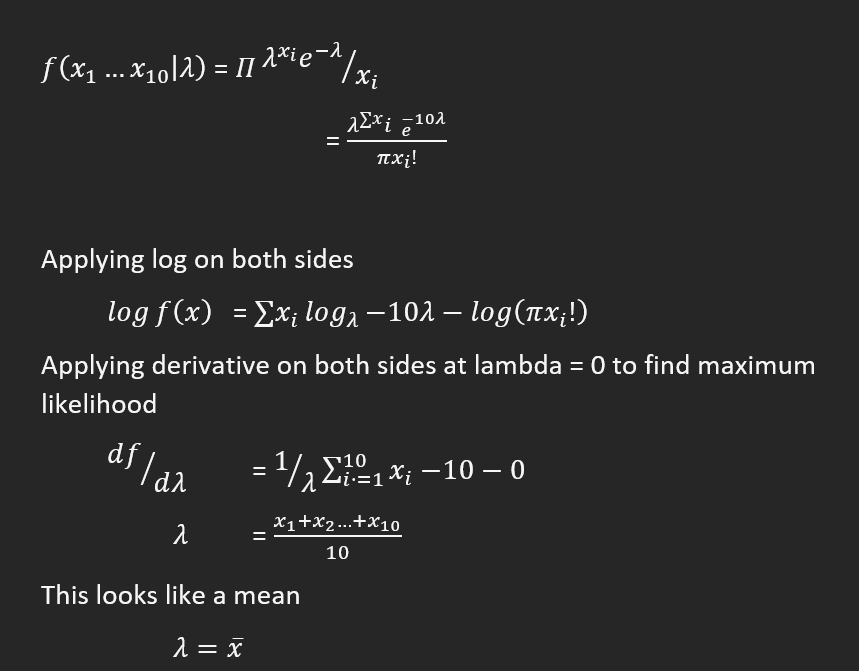

# (b) conjugate prior to the parameter λ  

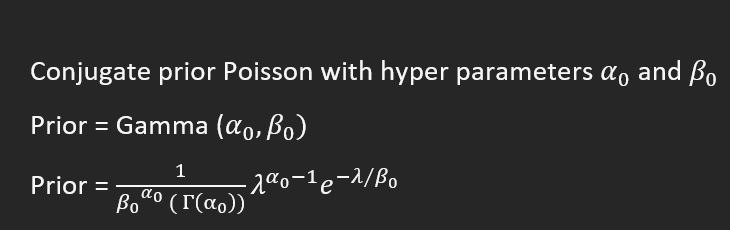

# (c) Posterior distribution of  λ

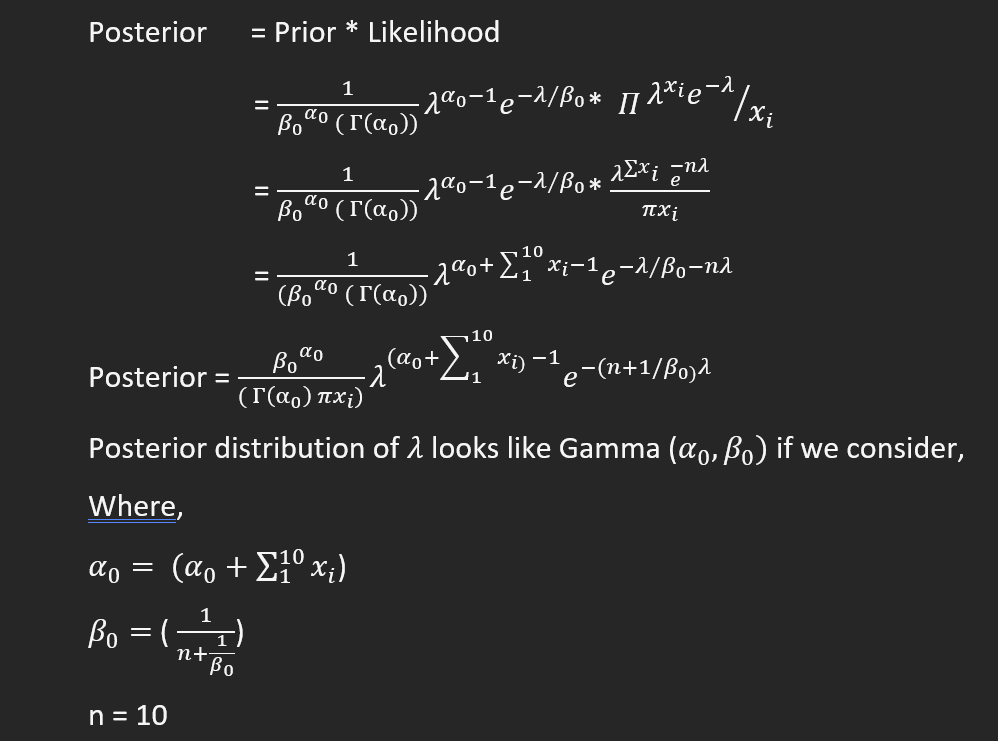

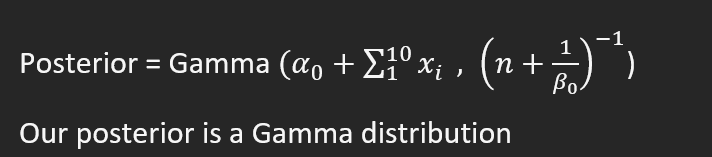

# (d) Minimum Bayesian risk estimator of  λ

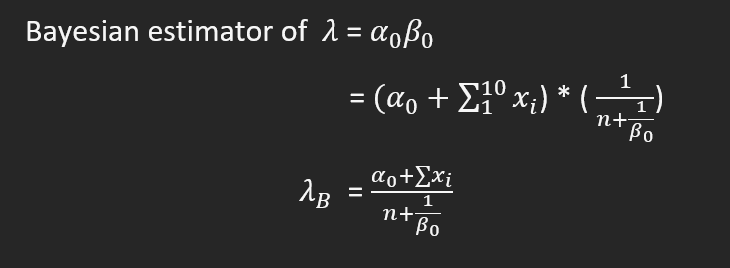

# Question 3

Creating a data frame with the values from the table

In [ ]:
%%R
Yes = c(200,250)
No = c(150,300)
cant_say = c(50,50)

df = data.frame(Yes,No,cant_say)
rownames(df) = c('Male','Female')
df

       Yes  No cant_say
Male   200 150       50
Female 250 300       50


# (a)	State the hypotheses.                                                            

H0 : Gender and opinion on women reservation are independent.

H1 : Gender and opinion on women reservation are dependent.

calculate the degree of freedom
degree of freedom = (rows-1) * (columns-1)
df = (2-1) * (3-1)
df = 2

# (b) for degree of freedom = 2, at significance = 0.05 from the chi square table, the critical value is 5.99

Decision rule : reject Ho if value of test statistic X2 > 5.99

By manual calculations we find the test statistic X2 

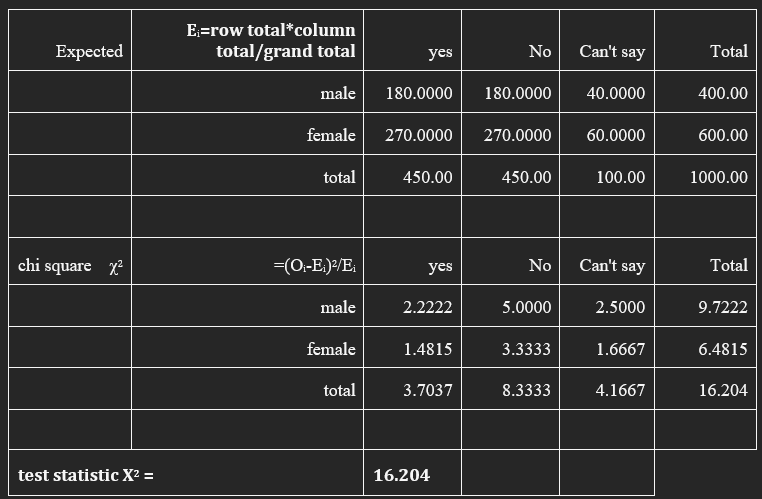

Through Code

In [ ]:
%%R
chisq <- chisq.test(df)
chisq


	Pearson's Chi-squared test

data:  df
X-squared = 16.204, df = 2, p-value = 0.000303



# (c) Decision and Interpret results.

As X -squared is 16.204 which is greater than critical value which is 5.99 it is evident that we reject the null hypotheses and accept the alternate hypotheses i.e. Gender and opinion on women reservations are dependent.